# MNIST Hand Writing

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
mnist

/Users/fifi/Library/Caches/pypoetry/virtualenvs/ml-book-oreilly-scikit-keras-tf-wYfakSSe-py3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

# This dataset has 70,000 images, and each image has 784 features.

((70000, 784), (70000,))

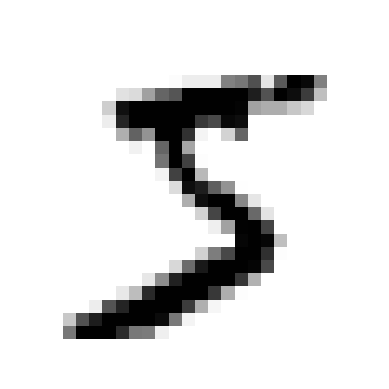

In [5]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")

plot_digit(X[0])

In [6]:
y[0]
# this is a 5

'5'

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier
# To reccognize 5s and Non-5s

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

# Stochastic Gradient Descent (SGD) classifier
# capable of handling very large datasets efficiently

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Now we can use it to detect images of the number 5:
sgd_clf.predict([X[0]])

array([ True])

In [9]:
# Let's evaluate this model's performance.
# Implementing Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# Above 95% accuracy
# Let's try a dumb classifier that just classifies every single image in the "not-5" class:

array([0.95035, 0.96035, 0.9604 ])

In [10]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
any(dummy_clf.predict([X_train]))

False

In [11]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# 90% accuracy
# If we just guess "not-5" every time, we will be right about 90% of the time.

array([0.90965, 0.90965, 0.90965])

In [12]:
# Confusion Matrix
# A much better way to evaluate the performance of a classifier is to look at the confusion matrix.
# The general idea is to count the number of times instances of class A are classified as class B.

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

# First row considers non-5 images (negative class):
# 53,272 were correctly classified as non-5s (true negatives)
# 687 were wrongly classified as 5s (false positives)
# Second row considers the images of 5s (positive class):
# 1891 were wrongly classified as non-5s (false negatives)
# 3530 were classified as 5s (true positives) 

# The best cm would only have true positives and true negatives

array([[53892,   687],
       [ 1891,  3530]])

In [13]:
y_train_perfect_predictions = y_train_5
cm = confusion_matrix(y_train_5, y_train_perfect_predictions)
cm

# The perfect cm

array([[54579,     0],
       [    0,  5421]])

In [14]:
# Precision and Recall
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
# precision is the accuracy of the positive predictions
# recall is the ratio of positive instances that are correctly detected by the classifier

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [15]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [16]:
# F1 score
# F1 = 2 / ((1/precision) + (1/recall))
# Combines precision and recall into a single metric

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

# Sometimes we would like to have a more precise control over precision/recall tradeoff.
# ex. Classifier for videos that are safe for kids.
# We would prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision)
# rather than a classifier that has a much higher recall but lets a few really bad videos show up (low precision)

# On the other hand, suppose we are building a classifier to detect shoplifters on surveillance images:
# It is probably fine if our classifier has only 30% precision as long as it has 99% recall
# (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught)

0.7325171197343846

![Alt text](image-1.png)

In [17]:
y_scores = sgd_clf.decision_function([X_train[0]])
y_scores

array([2164.22030239])

In [19]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [20]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

# Proof that raising the threshold decreases recall

array([False])

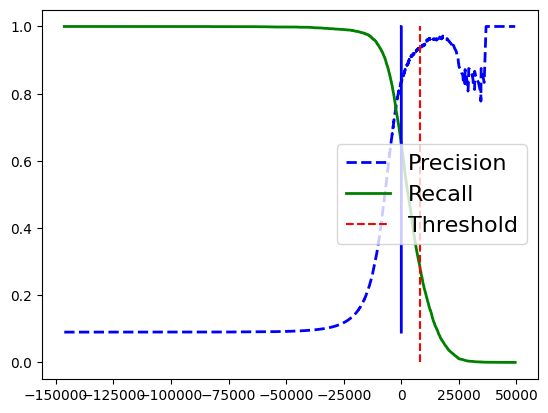

In [22]:
# How to decide which threshold to use?
# Use cross_val_predict() to get the scores of all instances in the training set, but specify that you want to return decision scores instead of predictions:

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

# Calculate precision and recall for all possible thresholds using the precision_recall_curve() function:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1, colors='r', linestyles='dashed', label='Threshold')
plt.legend(loc="center right", fontsize=16)

plt.plot(recalls, precisions, "b-", linewidth=2, label='Precision vs Recall')
plt.show()

# Precision really starts to fall sharply around 80% recall
# We will probably want to select a precision/recall tradeoff just before that drop
